# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
cities_df = pd.DataFrame(cities)

print("Beginning Data Retrieval")
print("-----------------------------")

cities_df

working_cities=[]
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for index, row in cities_df.iterrows():

    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row[0]
    unit = "imperial"
    api_key = weather_api_key

    query_url = f"{url}q={city}&appid={api_key}&units={unit}"


    cities_json = requests.get(query_url).json()

    #print(json.dumps(cities_json, indent=4, sort_keys=True))
    if("weather" in cities_json):
        working_cities.append(cities_json['name'])
        lat.append(cities_json['coord']['lat'])
        lng.append(cities_json['coord']['lon'])
        max_temp.append(cities_json['main']['temp_max'])
        humidity.append(cities_json['main']['humidity'])
        cloudiness.append(cities_json['clouds']['all'])
        wind_speed.append(cities_json['wind']['speed'])
        country.append(cities_json['sys']['country'])
        date.append(cities_json['dt'])
        print(f"Processing Record {len(working_cities)} of Set 1 | {city}")

    else:
        print("City not found. Skipping")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | miles city
Processing Record 3 of Set 1 | san policarpo
Processing Record 4 of Set 1 | sitka
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | makueni
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | muros
City not found. Skipping
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | kaitangata
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | santa isabel do rio negro
City not found. Skipping
Processing Record 17 of Set 1 | aljezur
Processing Record 18 of Set 1 | rundu
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [92]:
cities_dict = {
    "City": working_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

cities_data = pd.DataFrame(cities_dict)

cities_data.to_csv(output_data_file)

cities_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,38.07,76,59,2.01,GL,1624700297
1,Miles City,46.4083,-105.8406,58.17,62,75,3.44,US,1624700297
2,San Policarpo,12.1791,125.5072,83.39,72,100,2.21,PH,1624700298
3,Sitka,57.0531,-135.3300,55.29,88,90,5.75,US,1624700298
4,Lebu,-37.6167,-73.6500,43.77,81,6,7.63,CL,1624700299
...,...,...,...,...,...,...,...,...,...
586,Bonnyville,54.2668,-110.7350,58.80,79,74,2.82,CA,1624700517
587,Manali,13.1667,80.2667,93.29,61,79,5.75,IN,1624700517
588,Kristinestad,62.2743,21.3760,67.64,57,72,13.02,FI,1624700518
589,Khanbari,27.3747,87.2039,82.94,74,75,5.06,NP,1624700518


In [93]:
cities_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,21.074078,17.455359,71.179120,67.661591,55.790186,7.367547,1.624700e+09
std,32.747203,88.869544,15.375226,23.817609,37.719571,5.173240,8.773658e+01
min,-54.800000,-179.166700,28.350000,4.000000,0.000000,0.000000,1.624700e+09
25%,-3.663100,-61.060250,60.675000,52.500000,18.000000,3.440000,1.624700e+09
50%,25.519800,21.376000,73.020000,75.000000,66.000000,6.220000,1.624700e+09
75%,49.950750,95.655900,81.375000,87.000000,90.000000,9.965000,1.624700e+09
max,78.218600,179.316700,111.540000,100.000000,100.000000,28.700000,1.624701e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [94]:
cities_data.loc[cities_data["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [82]:
#  Get the indices of cities that have humidity over 100%.


In [83]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

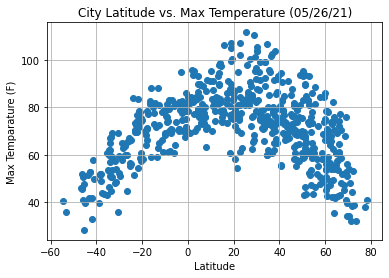

In [154]:
title = "City Latitude vs. Max Temperature (05/26/21)"

x_axis = cities_data["Lat"]
x_label = "Latitude"

y_axis = cities_data["Max Temp"]
y_label = "Max Temparature (F)"

plt.scatter(x_axis, y_axis)
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()

plt.savefig("output_data/Fig1.jpg")

plt.show()


<b>The code above created a scatter plot that contains the Latitudes and Max Temperatures of all the cities in cities_data. The x-axis plots the Latitude and the y-axis plots the Max Temperature in Fahrenheit. It also exports the graph in JPG format as Fig1.<b>

## Latitude vs. Humidity Plot

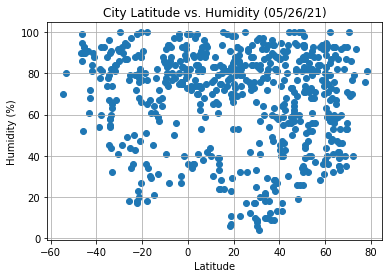

In [155]:
title = "City Latitude vs. Humidity (05/26/21)"

x_axis = cities_data["Lat"]
x_label = "Latitude"

y_axis = cities_data["Humidity"]
y_label = "Humidity (%)"

plt.scatter(x_axis, y_axis)
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()

plt.savefig("output_data/Fig2.jpg")

plt.show()

<b>The code above created a scatter plot that contains the Latitudes and Humidity values of all the cities in cities_data. The x-axis plots the Latitude and the y-axis plots the Humidity in Percentages. It also exports the graph in JPG format as Fig2.<b>

## Latitude vs. Cloudiness Plot

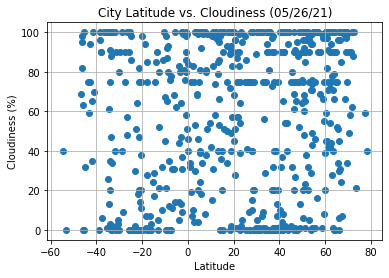

In [156]:
title = "City Latitude vs. Cloudiness (05/26/21)"

x_axis = cities_data["Lat"]
x_label = "Latitude"

y_axis = cities_data["Cloudiness"]
y_label = "Cloudiness (%)"

plt.scatter(x_axis, y_axis)
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()

plt.savefig("output_data/Fig3.jpg")

plt.show()

<b>The code above created a scatter plot that contains the Latitudes and Cloudiness values of all the cities in cities_data. The x-axis plots the Latitude and the y-axis plots the Cloudiness values in Percentages. It also exports the graph in JPG format as Fig3.<b>

## Latitude vs. Wind Speed Plot

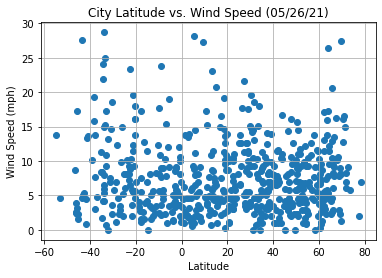

In [157]:
title = "City Latitude vs. Wind Speed (05/26/21)"

x_axis = cities_data["Lat"]
x_label = "Latitude"

y_axis = cities_data["Wind Speed"]
y_label = "Wind Speed (mph)"

plt.scatter(x_axis, y_axis)
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()

plt.savefig("output_data/Fig4.jpg")

plt.show()

<b>The code above created a scatter plot that contains the Latitudes and Wind Speed of all the cities in cities_data. The x-axis plots the Latitude and the y-axis plots the Wind Speed in Miles per Hour. It also exports the graph in JPG format as Fig4.<b>

## Linear Regression

In [107]:
cities_n_hem = cities_data.loc[cities_data["Lat"] > 0]

cities_s_hem = cities_data.loc[cities_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3611736356793827


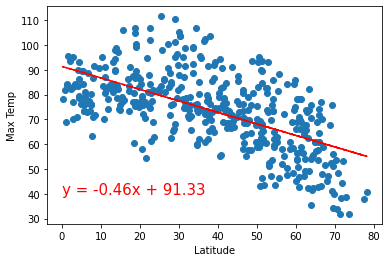

In [132]:
x_axis = cities_n_hem["Lat"]
x_label = "Latitude"

y_axis = cities_n_hem["Max Temp"]
y_label = "Max Temp"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

n_slope, n_int, n_r, n_p, n_std_err = st.linregress(x_axis, y_axis)
n_fit = n_slope * x_axis + n_int
line_eq = f"y = {str(round(n_slope, 2))}x + {str(round(n_int, 2))}"

plt.plot(x_axis,n_fit,"--", color="red")
plt.annotate(line_eq, (0,40), fontsize=15, color="red")

print(f"The r-value is: {n_r**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6280389990311877


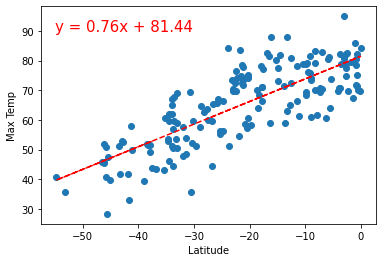

In [133]:
x_axis = cities_s_hem["Lat"]
x_label = "Latitude"

y_axis = cities_s_hem["Max Temp"]
y_label = "Max Temp"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

s_slope, s_int, s_r, s_p, s_std_err = st.linregress(x_axis, y_axis)
s_fit = s_slope * x_axis + s_int
line_eq = f"y = {str(round(s_slope, 2))}x + {str(round(s_int, 2))}"

plt.plot(x_axis,s_fit,"--", color="red")
plt.annotate(line_eq, (-55,90), fontsize=15, color="red")

print(f"The r-value is: {s_r**2}")

plt.show()

<b>The first graph showcases the linear regression between Latitude and Max Temperature of cities located in the northern hemisphere, whereas the second graph showcases the linear regression between Latitude and Max Temperature of cities located in the southern hemisphere. I noticed that the linear regression in the first graph has a negative slope, which makes sense as the futher away from the equator you travel, the colder it gets. I also noticed that the regression in the second graph has a positive slope, which also makes sense since the further away you travel from the equator, the colder it gets. Hence, in the northern hemisphere, there is a negative correlation between the Lattitude and Max Temperature, whereas in the southern hemisphere, there is a positive correlation between the Lattitude and Max Temperature.<b>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0005467710909389416


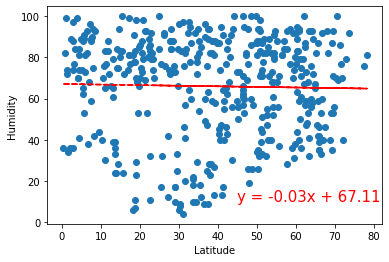

In [136]:
x_axis = cities_n_hem["Lat"]
x_label = "Latitude"

y_axis = cities_n_hem["Humidity"]
y_label = "Humidity"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

n_slope, n_int, n_r, n_p, n_std_err = st.linregress(x_axis, y_axis)
n_fit = n_slope * x_axis + n_int
line_eq = f"y = {str(round(n_slope, 2))}x + {str(round(n_int, 2))}"

plt.plot(x_axis,n_fit,"--", color="red")
plt.annotate(line_eq, (45,10), fontsize=15, color="red")

print(f"The r-value is: {n_r**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0010088449049784184


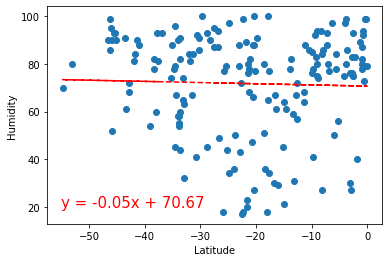

In [145]:
x_axis = cities_s_hem["Lat"]
x_label = "Latitude"

y_axis = cities_s_hem["Humidity"]
y_label = "Humidity"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

s_slope, s_int, s_r, s_p, s_std_err = st.linregress(x_axis, y_axis)
s_fit = s_slope * x_axis + s_int
line_eq = f"y = {str(round(s_slope, 2))}x + {str(round(s_int, 2))}"

plt.plot(x_axis,s_fit,"--", color="red")
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")

print(f"The r-value is: {s_r**2}")

plt.show()

<b>The first graph showcases the linear regression between Latitude and Humidity of cities located in the northern hemisphere, whereas the second graph showcases the linear regression between Latitude and Humidity of cities located in the southern hemisphere. Due to the low r-values, it seems to me that there does not seem to be a correlation between the Lattitudes and Humidity values in both the northern and southern hemisphere.<b>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.002711430813389978


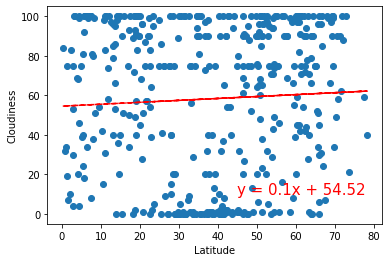

In [143]:
x_axis = cities_n_hem["Lat"]
x_label = "Latitude"

y_axis = cities_n_hem["Cloudiness"]
y_label = "Cloudiness"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

n_slope, n_int, n_r, n_p, n_std_err = st.linregress(x_axis, y_axis)
n_fit = n_slope * x_axis + n_int
line_eq = f"y = {str(round(n_slope, 2))}x + {str(round(n_int, 2))}"

plt.plot(x_axis,n_fit,"--", color="red")
plt.annotate(line_eq, (45,10), fontsize=15, color="red")

print(f"The r-value is: {n_r**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 8.999585078136331e-05


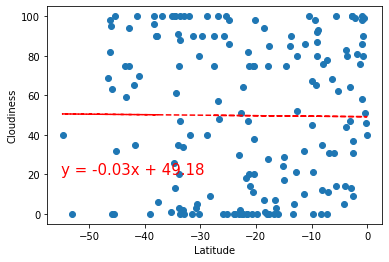

In [146]:
x_axis = cities_s_hem["Lat"]
x_label = "Latitude"

y_axis = cities_s_hem["Cloudiness"]
y_label = "Cloudiness"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

s_slope, s_int, s_r, s_p, s_std_err = st.linregress(x_axis, y_axis)
s_fit = s_slope * x_axis + s_int
line_eq = f"y = {str(round(s_slope, 2))}x + {str(round(s_int, 2))}"

plt.plot(x_axis,s_fit,"--", color="red")
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")

print(f"The r-value is: {s_r**2}")

plt.show()

<b>The first graph showcases the linear regression between Latitude and Cloudiness of cities located in the northern hemisphere, whereas the second graph showcases the linear regression between Latitude and Cloudiness of cities located in the southern hemisphere. Due to the low r-values, it seems to me that there does not seem to be a correlation between the Lattitudes and Cloudiness values in both the northern and southern hemisphere.<b>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0022517423664284303


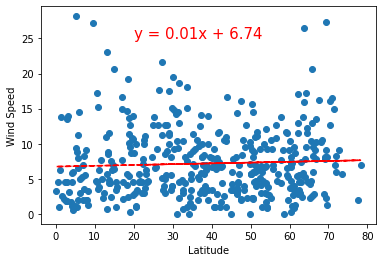

In [148]:
x_axis = cities_n_hem["Lat"]
x_label = "Latitude"

y_axis = cities_n_hem["Wind Speed"]
y_label = "Wind Speed"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

n_slope, n_int, n_r, n_p, n_std_err = st.linregress(x_axis, y_axis)
n_fit = n_slope * x_axis + n_int
line_eq = f"y = {str(round(n_slope, 2))}x + {str(round(n_int, 2))}"

plt.plot(x_axis,n_fit,"--", color="red")
plt.annotate(line_eq, (20,25), fontsize=15, color="red")

print(f"The r-value is: {n_r**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.028447097557318342


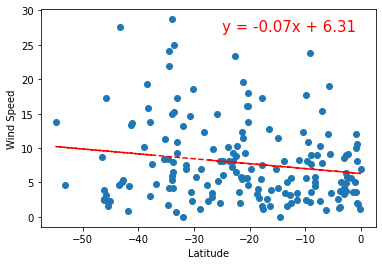

In [151]:
x_axis = cities_s_hem["Lat"]
x_label = "Latitude"

y_axis = cities_s_hem["Wind Speed"]
y_label = "Wind Speed"

plt.scatter(x_axis, y_axis)
plt.xlabel(x_label)
plt.ylabel(y_label)

s_slope, s_int, s_r, s_p, s_std_err = st.linregress(x_axis, y_axis)
s_fit = s_slope * x_axis + s_int
line_eq = f"y = {str(round(s_slope, 2))}x + {str(round(s_int, 2))}"

plt.plot(x_axis,s_fit,"--", color="red")
plt.annotate(line_eq, (-25,27), fontsize=15, color="red")

print(f"The r-value is: {s_r**2}")

plt.show()

<b>The first graph showcases the linear regression between Latitude and Wind Speed of cities located in the northern hemisphere, whereas the second graph showcases the linear regression between Latitude and Wind Speed of cities located in the southern hemisphere. Due to the low r-values, it seems to me that there does not seem to be a correlation between the Lattitudes and Wind Speed in both the northern and southern hemisphere.<b>